In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the updated data so not to run the above cells
df_morrisons = pd.read_csv('datasets/updated_data/updated_All_Data_Morrisons.csv')

df_morrisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496571 entries, 0 to 23496570
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   supermarket     object 
 1   price           float64
 2   per_unit_price  float64
 3   unit            object 
 4   names           object 
 5   date            object 
 6   category        object 
 7   own_brand       bool   
 8   Week            int64  
 9   Quantity        int64  
 10  Revenue         float64
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 1.8+ GB


In [2]:
# Convert 'date' column to datetime format
df_morrisons['date'] = pd.to_datetime(df_morrisons['date'])

# Adding a 'day_of_week_num' column (Monday=0, Sunday=6)
df_morrisons['day_of_week_num'] = df_morrisons['date'].dt.dayofweek

# Adding a 'week_of_month' column
df_morrisons['week_of_month'] = df_morrisons['date'].apply(lambda x: (x.day-1) // 7 + 1)

In [3]:
# columns to be copied into a new dataframe
columnstoCopy_morrisons = ['date', 'category', 'Revenue', 'day_of_week_num', 'week_of_month']
morrisonsSub_data = df_morrisons[columnstoCopy_morrisons].copy()

In [4]:
categories = [
    'meat_poultry_fish', 'other_food_cupboard', 'frozen', 'other_fresh_food', 
    'other_drinks', 'bakery', 'vegetables', 'cooking_essentials', 'fruits', 
    'other_household', 'pantry_staples', 'alcoholic_beverages', 'cold_beverages', 
    'personal_care', 'cleaning_supplies', 'pets', 'other_health_products', 
    'breakfast_items', 'baby_products', 'hot_beverages', 'free-from', 
    'medication', 'kitchen_essentials', 'coffee_and_tea_related'
]

# Defining a custom mapping dictionary
customMapping = {
    'meat_poultry_fish': 1,
    'other_food_cupboard': 2,
    'frozen': 3,
    'other_fresh_food': 4,
    'other_drinks': 5,
    'bakery': 6,
    'vegetables': 7,
    'cooking_essentials': 8,
    'fruits': 9,
    'other_household': 10,
    'pantry_staples': 11,
    'alcoholic_beverages': 12,
    'cold_beverages': 13,
    'personal_care': 14,
    'cleaning_supplies': 15,
    'pets': 16,
    'other_health_products': 17,
    'breakfast_items': 18,
    'baby_products': 19,
    'hot_beverages': 20,
    'free-from': 21,
    'medication': 22,
    'kitchen_essentials': 23,
    'coffee_and_tea_related': 24
}

# Applying custom mapping to categories
categoryNumericalCustom = [customMapping[cat] for cat in categories]

# Overwriting the content within the category column (changing from string to numerical)
morrisonsSub_data['category'] = morrisonsSub_data['category'].map(customMapping)

# Checking to see if the changes have been made
morrisonsSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month
0,2024-04-13,21.0,12.6,5,2
1,2024-04-13,21.0,14.7,5,2
2,2024-04-13,21.0,14.7,5,2
3,2024-04-13,21.0,10.5,5,2
4,2024-04-13,21.0,14.7,5,2


In [5]:
morrisonsSub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496571 entries, 0 to 23496570
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   category         float64       
 2   Revenue          float64       
 3   day_of_week_num  int32         
 4   week_of_month    int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 806.7 MB


In [6]:
# Ensure 'date' is a datetime object
morrisonsSub_data['date'] = pd.to_datetime(morrisonsSub_data['date'])

# Sort DataFrame by 'date'
morrisonsSub_data.sort_values('date', inplace=True)

# sin and cosine components
morrisonsSub_data['sin_day'] = np.sin(2*np.pi*morrisonsSub_data['day_of_week_num']/7)
morrisonsSub_data['cos_day'] = np.cos(2*np.pi*morrisonsSub_data['day_of_week_num']/7)

# sine and cosine for week of the month
morrisonsSub_data['sin_week'] = np.sin(2*np.pi*morrisonsSub_data['week_of_month']/4)
morrisonsSub_data['cos_week'] = np.cos(2*np.pi*morrisonsSub_data['week_of_month']/4)

# Calculate the number of days since each category was last seen
morrisonsSub_data['Last_Seen_Days'] = morrisonsSub_data.groupby('category')['date'].transform(lambda x: x.diff().dt.days)

# Display the DataFrame
morrisonsSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days
23496570,2024-01-09,NaN,45.00,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
23338396,2024-01-09,10.0,18.00,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
23338395,2024-01-09,16.0,26.25,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
23338394,2024-01-09,16.0,31.50,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
23338393,2024-01-09,16.0,31.50,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0


In [7]:
morrisonsSub_data.dropna(inplace=True)
morrisonsSub_data['Last_Seen_Days'].value_counts()

Last_Seen_Days
0.0    20759306
1.0        2102
2.0          51
3.0          25
Name: count, dtype: int64

In [8]:
# Creating lags
morrisonsSub_data.sort_values('date', inplace=True)  # Sort data by date if not already sorted
#morrisonsSub_data.set_index('date', inplace=True)
morrisonsSub_data.sort_index(inplace=True) 
#morrisonsSub_data.set_index('date', inplace=True)  # Set 'date' as index if you want to use date functionality

# Create lagged data columns
morrisonsSub_data['Revenue_lag1'] = morrisonsSub_data.groupby('category')['Revenue'].shift(1)
morrisonsSub_data['Revenue_lag2'] = morrisonsSub_data.groupby('category')['Revenue'].shift(2)
morrisonsSub_data['Revenue_lag3'] = morrisonsSub_data.groupby('category')['Revenue'].shift(3)
morrisonsSub_data['sin_day_lag1'] = morrisonsSub_data.groupby('category')['sin_day'].shift(1)
morrisonsSub_data['cos_day_lag1'] = morrisonsSub_data.groupby('category')['cos_day'].shift(1)
morrisonsSub_data['sin_week_lag1'] = morrisonsSub_data.groupby('category')['sin_week'].shift(1)
morrisonsSub_data['cos_week_lag1'] = morrisonsSub_data.groupby('category')['cos_week'].shift(1)

#df['Revenue_change'] = (df['Revenue'] - df['Revenue_lag1'])/df['Revenue_lag1']

# Calcul#ate the 7-day rolling mean
morrisonsSub_data['weekly_rolling_avg'] = morrisonsSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).mean()

# Calculate the 7-day rolling standard deviation
morrisonsSub_data['weekly_rolling_std'] = morrisonsSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).std()

#print(morrisonsSub_data[['weekly_rolling_avg', 'weekly_rolling_std']])

# Resample data to weekly frequency, calculate mean and std for each week
#weekly_data = morrisonsSub_data.resample('W').agg({'Revenue_lag1': ['mean', 'std']})
#weekly_data.columns = ['weekly_avg', 'weekly_std']  # Flatten the column hierarchy
#print(weekly_data)

# Handle any NaN values that arise from shifting
morrisonsSub_data.fillna(0, inplace=True)  # You may choose to handle NaNs differently based on your context

# Now your DataFrame includes lagged variables
morrisonsSub_data

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2024-04-13,21.0,12.6,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000
1,2024-04-13,21.0,14.7,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,12.6,0.0,0.0,-0.974928,-0.222521,1.224647e-16,-1.0,12.600000,0.000000
2,2024-04-13,21.0,14.7,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,14.7,12.6,0.0,-0.974928,-0.222521,1.224647e-16,-1.0,13.650000,1.484924
3,2024-04-13,21.0,10.5,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,14.7,14.7,12.6,-0.974928,-0.222521,1.224647e-16,-1.0,14.000000,1.212436
4,2024-04-13,21.0,14.7,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,10.5,14.7,14.7,-0.974928,-0.222521,1.224647e-16,-1.0,13.125000,2.010597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23496398,2024-01-09,17.0,18.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,21.0,21.0,21.0,0.781831,0.623490,1.224647e-16,-1.0,19.285714,2.927700
23496399,2024-01-09,17.0,18.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,18.0,21.0,21.0,0.781831,0.623490,1.224647e-16,-1.0,19.714286,2.360387
23496400,2024-01-09,17.0,9.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,18.0,18.0,21.0,0.781831,0.623490,1.224647e-16,-1.0,19.285714,2.360387
23496401,2024-01-09,17.0,10.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,9.0,18.0,18.0,0.781831,0.623490,1.224647e-16,-1.0,18.428571,4.391550


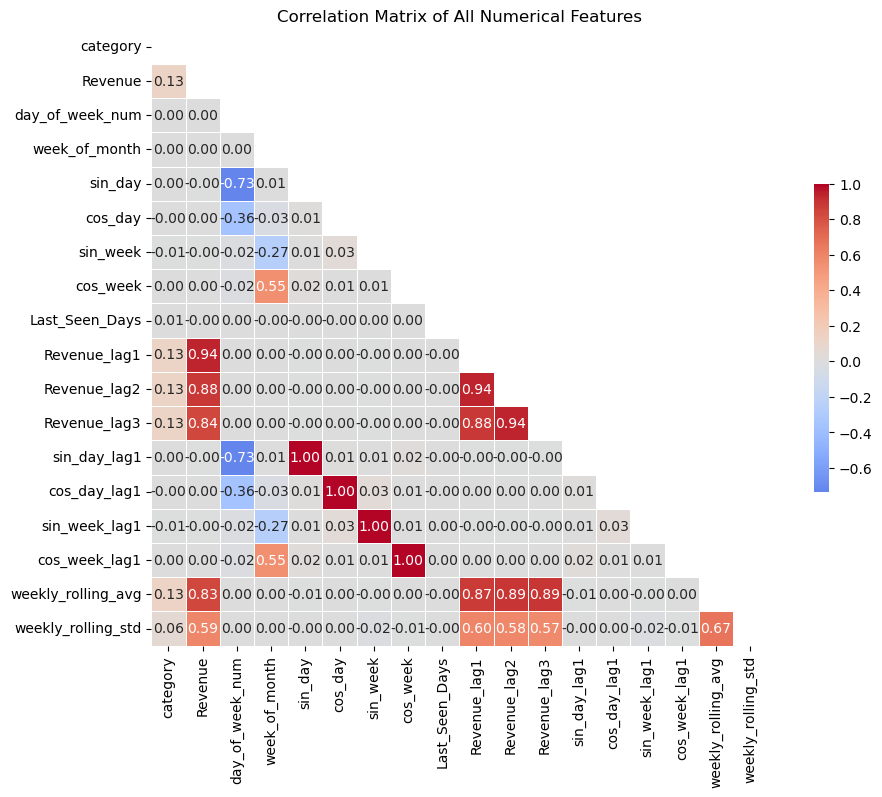

In [9]:
# Compute the correlation matrix for all columns except 'date' as it's datetime
numerical_morrisonsSub_data = morrisonsSub_data.select_dtypes(include=[np.number])
corr = numerical_morrisonsSub_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title and format axes
plt.title('Correlation Matrix of All Numerical Features')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [10]:
# This function is used to reduce memory of a pandas dataframe
# The idea is cast the numeric type to another more memory-effective type
# For ex: Features "age" should only need type='np.int8'
# Source: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [11]:
reduced_morrisons = reduce_mem_usage(morrisonsSub_data)
reduced_morrisons.head()

Memory usage of dataframe is 3088.75 MB
Memory usage after optimization is: 989.98 MB
Decreased by 67.9%


,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2024-04-13,21.0,12.601562,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2024-04-13,21.0,14.703125,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,12.601562,0.000000,0.000000,-0.975098,-0.222534,0.0,-1.0,12.601562,0.000000
2,2024-04-13,21.0,14.703125,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,14.703125,12.601562,0.000000,-0.975098,-0.222534,0.0,-1.0,13.648438,1.485352
3,2024-04-13,21.0,10.500000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,14.703125,14.703125,12.601562,-0.975098,-0.222534,0.0,-1.0,14.000000,1.212891
4,2024-04-13,21.0,14.703125,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,10.500000,14.703125,14.703125,-0.975098,-0.222534,0.0,-1.0,13.125000,2.009766


In [12]:
'''
# Sample 10% of the data without replacement for the sampled data
sampled_df = reduced_morrisons.sample(frac=0.1, random_state=42)

# Get the indices of the sampled data
sampled_indices = sampled_df.index

# Display the size of the original and sampled dataframes
print(f"Original Data Size: {len(reduced_morrisons)}")
print(f"Sampled Data Size: {len(sampled_df)}")
'''

Original Data Size: 20761484
Sampled Data Size: 2076148


In [13]:
'''
#Get the indices of the sampled data
sampled_indices = sampled_df.index

# Drop these indices from the original dataframe to create the test set
test_set_df = reduced_morrisons.drop(sampled_indices)

# show the size of the test set
print(f"Test set data size: {len(test_set_df)}")
'''

Test set data size: 18685336


In [14]:
'''
# Save the sampled DataFrame to a CSV file
sampled_df.to_csv('datasets/sampled_test_datasets/sampled_data_morrisons.csv', index=False)

# Save the test set DataFrame to a CSV file
test_set_df.to_csv('datasets/sampled_test_datasets/test_set_data_morrisons.csv', index=False)
'''

In [15]:
from sklearn.model_selection import train_test_split

# Load data
train_data = pd.read_csv('datasets/sampled_test_datasets/sampled_data_morrisons.csv')
test_data = pd.read_csv('datasets/sampled_test_datasets/test_set_data_morrisons.csv')

# Ensure 'date' is a datetime object
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Separate features and target
X_train_full = train_data.drop(['date','Revenue'], axis=1)
y_train_full = train_data['Revenue']
X_test = test_data.drop(['date','Revenue'], axis=1)
y_test = test_data['Revenue']

# Splitting training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [16]:
X_train_full.head()

,category,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2.0,3,2,0.4338,-0.9010,0.0,-1.0,0.0,8.50,8.94,10.43,0.4338,-0.9010,0.0,-1.0,9.305,1.166
1,18.0,1,4,0.7817,0.6235,-0.0,1.0,0.0,24.44,24.44,20.94,0.7817,0.6235,-0.0,1.0,21.940,2.639
2,5.0,1,4,0.7817,0.6235,-0.0,1.0,0.0,7.00,7.00,5.00,0.7817,0.6235,-0.0,1.0,6.145,0.900
3,9.0,2,2,0.9750,-0.2225,0.0,-1.0,0.0,6.80,6.80,7.50,0.9750,-0.2225,0.0,-1.0,8.550,1.560
4,16.0,2,5,0.9750,-0.2225,1.0,0.0,0.0,27.00,7.96,13.93,0.9750,-0.2225,1.0,0.0,13.690,6.110


In [17]:
# Continue with your data splitting and model training
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [18]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076148 entries, 0 to 2076147
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   category            float64
 1   day_of_week_num     int64  
 2   week_of_month       int64  
 3   sin_day             float64
 4   cos_day             float64
 5   sin_week            float64
 6   cos_week            float64
 7   Last_Seen_Days      float64
 8   Revenue_lag1        float64
 9   Revenue_lag2        float64
 10  Revenue_lag3        float64
 11  sin_day_lag1        float64
 12  cos_day_lag1        float64
 13  sin_week_lag1       float64
 14  cos_week_lag1       float64
 15  weekly_rolling_avg  float64
 16  weekly_rolling_std  float64
dtypes: float64(15), int64(2)
memory usage: 269.3 MB


## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math



# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Validate the model
y_pred_val = lin_reg.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Validation RMSE: 13.27477079531058
Validation MAE: 5.195112751732272
Validation R^2: 0.8775651440056375


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, 
                               random_state=42)
rf_reg.fit(X_train, y_train)

# Validate the model
y_pred_val = rf_reg.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Validation RMSE: 9.345535944407112
Validation MAE: 2.471467823351524
Validation R^2: 0.9393180627931526


## XGBoost

In [21]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, 
                             learning_rate=0.1, 
                             random_state=42)
xgb_model.fit(X_train, y_train)

# Validate the model
y_pred_val = xgb_model.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Validation RMSE: 11.54103419247372
Validation MAE: 4.359533201081584
Validation R^2: 0.9074576619161594


## ANN

In [22]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize and train the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', 
                    input_dim=X_train.shape[1]))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', 
                  loss='mean_squared_error')

# Fit model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Validate the model
y_pred_val = ann_model.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Epoch 1/20


/Users/sowmyamaddali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51904/51904 - 9s - 182us/step - loss: 155.3260
Epoch 2/20
51904/51904 - 10s - 183us/step - loss: 139.9007
Epoch 3/20
51904/51904 - 9s - 178us/step - loss: 138.0030
Epoch 4/20
51904/51904 - 9s - 166us/step - loss: 135.0157
Epoch 5/20
51904/51904 - 9s - 169us/step - loss: 135.6684
Epoch 6/20
51904/51904 - 9s - 169us/step - loss: 131.6835
Epoch 7/20
51904/51904 - 8s - 163us/step - loss: 128.1651
Epoch 8/20
51904/51904 - 8s - 163us/step - loss: 130.0372
Epoch 9/20
51904/51904 - 8s - 163us/step - loss: 127.9013
Epoch 10/20
51904/51904 - 8s - 163us/step - loss: 128.2395
Epoch 11/20
51904/51904 - 8s - 164us/step - loss: 126.5742
Epoch 12/20
51904/51904 - 8s - 163us/step - loss: 125.1295
Epoch 13/20
51904/51904 - 9s - 164us/step - loss: 125.8107
Epoch 14/20
51904/51904 - 8s - 163us/step - loss: 125.9285
Epoch 15/20
51904/51904 - 8s - 163us/step - loss: 124.3113
Epoch 16/20
51904/51904 - 8s - 163us/step - loss: 123.5270
Epoch 17/20
51904/51904 - 9s - 164us/step - loss: 123.7765
Epoch 18/20
5190

## LSTM

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Convert all data to float to prevent type issues with TensorFlow/Keras
X_train_full = X_train_full.astype(float)
X_test = X_test.astype(float)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=42)

# Reshape X for LSTM input [samples, time steps, features]
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential([
    LSTM(50, input_shape=(1, X_train.shape[1]), return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(loss='mean_squared_error', 
              optimizer='adam')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Fit the model to the training data with early stopping
model.fit(X_train_reshaped, y_train, 
          epochs=35, batch_size=72, 
          validation_data=(X_val_reshaped, y_val), 
          verbose=2, callbacks=[early_stopping])

# Predict using the test set to evaluate the model
y_test_pred = model.predict(X_test_reshaped)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

/Users/sowmyamaddali/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/35
23069/23069 - 19s - 820us/step - loss: 510.9934 - val_loss: 304.1559
Epoch 2/35
23069/23069 - 17s - 754us/step - loss: 325.5967 - val_loss: 315.0875
Epoch 3/35
23069/23069 - 17s - 753us/step - loss: 294.4148 - val_loss: 284.6626
Epoch 4/35
23069/23069 - 17s - 747us/step - loss: 291.7924 - val_loss: 234.3946
Epoch 5/35
23069/23069 - 17s - 750us/step - loss: 280.7635 - val_loss: 290.3693
Epoch 6/35
23069/23069 - 17s - 752us/step - loss: 288.3848 - val_loss: 231.3967
Epoch 7/35
23069/23069 - 17s - 748us/step - loss: 274.8422 - val_loss: 255.6930
Epoch 8/35
23069/23069 - 17s - 756us/step - loss: 284.5548 - val_loss: 235.3085
Epoch 9/35
23069/23069 - 17s - 754us/step - loss: 280.7438 - val_loss: 271.4549
Epoch 10/35
23069/23069 - 18s - 775us/step - loss: 284.6094 - val_loss: 240.4517
Epoch 11/35
23069/23069 - 17s - 722us/step - loss: 287.2495 - val_loss: 263.7041
583917/583917 ━━━━━━━━━━━━━━━━━━━━ 134s 229us/step
Validation RMSE: 11.3857714293368
Validation MAE: 4.474842322442966

## For the test set

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculating the metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")

# Assuming models are named as lin_reg, rf_reg, xgb_model, lstm_model, ann_model

# Evaluate Linear Regression
print("Linear Regression Results:")
evaluate_model(lin_reg, X_test, y_test)

# Evaluate Random Forest
print("Random Forest Results:")
evaluate_model(rf_reg, X_test, y_test)

# Evaluate XGBoost
print("XGBoost Results:")
evaluate_model(xgb_model, X_test, y_test)

# Evaluate ANN
print("ANN Results:")
evaluate_model(ann_model, X_test, y_test)

# Evaluate LSTM
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print("LSTM Results:")
evaluate_model(model, X_test_reshaped, y_test) 

Linear Regression Results:
RMSE: 13.18641280935876
MAE: 5.203445538557941
R^2: 0.880354857960578
Random Forest Results:
RMSE: 9.09418587917588
MAE: 2.4753729098862003
R^2: 0.9430925156103002
XGBoost Results:
RMSE: 11.602713613461503
MAE: 4.361059952253732
R^2: 0.9073680342728493
ANN Results:
583917/583917 ━━━━━━━━━━━━━━━━━━━━ 86s 146us/step
RMSE: 11.142526441674141
MAE: 4.476082581651105
R^2: 0.9145702606445328
LSTM Results:
583917/583917 ━━━━━━━━━━━━━━━━━━━━ 152s 260us/step
RMSE: 15.86734003814838
MAE: 5.398012733871474
R^2: 0.8267592751326929
